In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [2]:
df = pd.read_csv('train_FD001_selected_features.csv')
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
print('Shape:',df.shape)
df

Shape: (20631, 14)


array([[0.        , 0.18373494, 0.40680183, ..., 0.71317829, 0.7246617 ,
        0.52908587],
       [0.00277008, 0.28313253, 0.4530194 , ..., 0.66666667, 0.73101353,
        0.52631579],
       [0.00554017, 0.34337349, 0.36952256, ..., 0.62790698, 0.62137531,
        0.52354571],
       ...,
       [0.54570637, 0.66566265, 0.68497929, ..., 0.23255814, 0.05399061,
        0.00554017],
       [0.54847645, 0.60843373, 0.74602136, ..., 0.11627907, 0.23446562,
        0.00277008],
       [0.55124654, 0.79518072, 0.63963375, ..., 0.17829457, 0.21817178,
        0.        ]])

In [3]:
features = df[:,0:-1]
target = df[:,-1]
target

array([0.52908587, 0.52631579, 0.52354571, ..., 0.00554017, 0.00277008,
       0.        ])

In [4]:
win_length = 25   #Sliding Window Length
feature_num = 13  #Total number of features

ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

In [5]:
ts_generator[0]

(array([[[0.        , 0.18373494, 0.40680183, 0.30975692, 0.72624799,
          0.24242424, 0.36904762, 0.63326226, 0.20588235, 0.36398615,
          0.33333333, 0.71317829, 0.7246617 ],
         [0.00277008, 0.28313253, 0.4530194 , 0.35263336, 0.62801932,
          0.21212121, 0.38095238, 0.76545842, 0.27941176, 0.41131204,
          0.33333333, 0.66666667, 0.73101353],
         [0.00554017, 0.34337349, 0.36952256, 0.37052667, 0.71014493,
          0.27272727, 0.25      , 0.79530917, 0.22058824, 0.35744517,
          0.16666667, 0.62790698, 0.62137531],
         [0.00831025, 0.34337349, 0.25615871, 0.33119514, 0.74074074,
          0.31818182, 0.16666667, 0.8891258 , 0.29411765, 0.16660254,
          0.33333333, 0.57364341, 0.66238608],
         [0.01108033, 0.34939759, 0.25746675, 0.40462525, 0.66827697,
          0.24242424, 0.25595238, 0.74626866, 0.23529412, 0.40207772,
          0.41666667, 0.58914729, 0.70450152],
         [0.01385042, 0.26807229, 0.29278395, 0.27211344, 0.77616

In [6]:
print('Shape of the input features',np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Shape of the output variable',np.shape(ts_generator[0][1]))
print(ts_generator[0][1])

Shape of the input features (1, 25, 13)
[[[0.         0.18373494 0.40680183 0.30975692 0.72624799 0.24242424
   0.36904762 0.63326226 0.20588235 0.36398615 0.33333333 0.71317829
   0.7246617 ]
  [0.00277008 0.28313253 0.4530194  0.35263336 0.62801932 0.21212121
   0.38095238 0.76545842 0.27941176 0.41131204 0.33333333 0.66666667
   0.73101353]
  [0.00554017 0.34337349 0.36952256 0.37052667 0.71014493 0.27272727
   0.25       0.79530917 0.22058824 0.35744517 0.16666667 0.62790698
   0.62137531]
  [0.00831025 0.34337349 0.25615871 0.33119514 0.74074074 0.31818182
   0.16666667 0.8891258  0.29411765 0.16660254 0.33333333 0.57364341
   0.66238608]
  [0.01108033 0.34939759 0.25746675 0.40462525 0.66827697 0.24242424
   0.25595238 0.74626866 0.23529412 0.40207772 0.41666667 0.58914729
   0.70450152]
  [0.01385042 0.26807229 0.29278395 0.27211344 0.77616747 0.18181818
   0.18452381 0.63752665 0.22058824 0.33051174 0.25       0.65116279
   0.65272024]
  [0.0166205  0.38253012 0.46391977 0.2619

In [7]:
X=[]
y=[]
for i in range(len(ts_generator)):
    x_temp, y_temp = ts_generator[i]
    X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
    y.append(y_temp)

X=np.array(X)
y=np.array(y)

In [8]:
model=Sequential()
# CNN
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#model.summary()

In [9]:
model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

In [10]:
model.save('CNN_Model.h5')

# Predict on training data

In [11]:
prediction=model.predict(X)
np.shape(prediction)

644/644 [==============================] - 1s 1ms/step


(20606, 1)

In [12]:
rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.069252,0.286145,0.393285,0.233288,0.685990,0.257576,0.244048,0.765458,0.264706,0.388996,0.500000,0.558140,0.719000,0.492447
1,0.072022,0.370482,0.423588,0.330689,0.679549,0.181818,0.309524,0.705757,0.367647,0.306656,0.416667,0.658915,0.763601,0.485726
2,0.074792,0.343373,0.257249,0.284943,0.777778,0.333333,0.333333,0.827292,0.294118,0.413236,0.166667,0.674419,0.538387,0.473177
3,0.077562,0.210843,0.300632,0.316340,0.708535,0.227273,0.232143,0.793177,0.264706,0.361678,0.416667,0.612403,0.642778,0.477309
4,0.080332,0.298193,0.490081,0.233457,0.727858,0.257576,0.327381,0.746269,0.176471,0.313967,0.166667,0.705426,0.713615,0.484541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20601,0.540166,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.656791,0.750000,0.271318,0.109500,0.119804
20602,0.542936,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.727203,0.583333,0.124031,0.366197,0.128725
20603,0.545706,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.922278,0.833333,0.232558,0.053991,0.141174
20604,0.548476,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.823394,0.583333,0.116279,0.234466,0.133481


In [13]:
rev_trans = scaler.inverse_transform(rev_trans)# Transforming back to original scale
rev_trans =pd.DataFrame(rev_trans)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,26.0,642.16,1589.08,1396.07,554.11,2388.07,47.26,522.28,2388.06,8.4260,394.0,38.86,23.4149,177.773234
1,27.0,642.44,1590.47,1401.84,554.07,2388.02,47.37,522.00,2388.13,8.4046,393.0,38.99,23.4472,175.347150
2,28.0,642.35,1582.84,1399.13,554.68,2388.12,47.41,522.57,2388.08,8.4323,390.0,39.01,23.2841,170.816817
3,29.0,641.91,1584.83,1400.99,554.25,2388.05,47.24,522.41,2388.06,8.4189,393.0,38.93,23.3597,172.308394
4,30.0,642.20,1593.52,1396.08,554.37,2388.07,47.40,522.19,2388.00,8.4065,390.0,39.05,23.4110,174.919161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20601,196.0,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397.0,38.49,22.9735,43.249248
20602,197.0,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395.0,38.30,23.1594,46.469733
20603,198.0,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398.0,38.44,22.9333,50.963804
20604,199.0,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395.0,38.29,23.0640,48.186704


In [16]:
df_actual=pd.read_csv("train_FD001_selected_features.csv")
df_actual

,time,sen_measurement2,sen_measurement3,sen_measurement4,sen_measurement7,sen_measurement8,sen_measurement11,sen_measurement12,sen_measurement13,sen_measurement15,sen_measurement17,sen_measurement20,sen_measurement21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [17]:
print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

RMSE on This set: 43.45664355348341


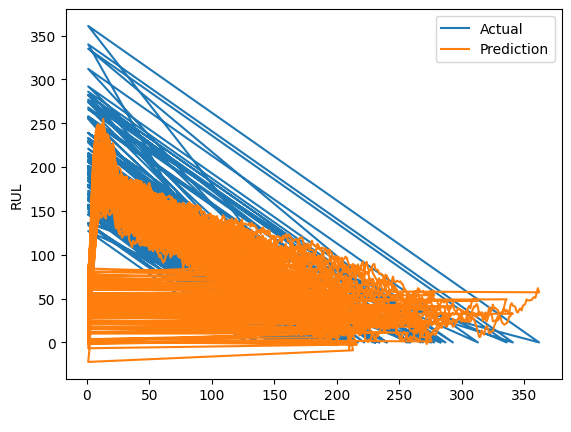

In [19]:
plt.plot(df_actual['time'][win_length:],df_actual['RUL'][win_length:])
plt.plot(rev_trans[0],rev_trans[13])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend([ 'Actual','Prediction'], loc='upper right')
plt.show()
print('\n')